<img src='./img/cams_header.png' alt='Logo EU Copernicus ECMWF' align='right' width='100%'></img>

<br>

# The Copernicus Atmosphere Data Store (ADS) - Introduction and data access example

This notebook provides you an introduction to the [Copernicus Atmosphere Data Store (ADS)](https://ads.atmosphere.copernicus.eu/) and gives you a practical example how to access and retrieve data from the ADS.

### Outline
* [1 - About](#about)
* [2 - CAMS data retrieval](#cams_data_retrieval)
  * [2.1 - Access data interactively via the ADS web interface](#access_manual)
  * [2.2 - Access data programmatically with the CDS API](#access_programmatic)
  * [2.3 - Further resources](#further_resources)
* [3 - Example: CAMS data request](#cams_example_requests)
* [4 - Load and visualize data from the ADS](#cams_load_data)

### How to access the notebook
* [**nbviewer**](https://nbviewer.org/github/jwagemann/202205_dwd_workshop/blob/master/01_atmosphere_data_store_intro.ipynb)
* [**Colab**](https://colab.research.google.com/github/jwagemann/202205_dwd_workshop/blob/master/01_atmosphere_data_store_intro.ipynb)
* [**Kaggle**](https://kaggle.com/kernels/welcome?src=https://github.com/jwagemann/202205_dwd_workshop/blob/master/01_atmosphere_data_store_intro.ipynb)

<hr>

## <a id='about'></a>1. About

The [Copernicus Atmosphere Data Store (ADS)](https://ads.atmosphere.copernicus.eu/) is the data access portal of the [Copernicus Atmosphere Monitoring Service (CAMS)](https://atmosphere.copernicus.eu/) and offers access to data about the `Earth's past, present and future atmosphere`. Find more information in the [Atmosphere Data Store (ADS) documentation](https://confluence.ecmwf.int/display/CKB/Atmosphere+Data+Store+%28ADS%29+documentation).

<br>

<img src='./img/cams_data_store.png' align='left' width='80%'></img>

<hr>

## <a id='cams_data_retrieval'></a>2. Data retrieval

There are two ways to access data from the Copernicus Atmosphere Data Store (ADS):
* [interactively](#access_manual) via the ADS web interface, or
* [programmatically](#access_programmatic) with the CDS API

In order to be able to access data from the Atmosphere Data Store (ADS), you first have to [self-register](https://ads.atmosphere.copernicus.eu/#!/home) at the ADS registration page (if you do not have an account yet) and second, you have to [login](https://ads.atmosphere.copernicus.eu/user/login) to the ADS portal. You will be able to browse the ADS web interface without beging logged in, but you have to login for being able to download data.

### <a id='access_manual'></a>2.1 Access data interactively via the ADS web interface

The `ADS web interface` allows you to interactively `browse`, `select` and `download` data products offered by the ADS. First, under [Datasets](https://ads.atmosphere.copernicus.eu/cdsapp#!/search?type=dataset), you can browse and select the data you are interested in. In a second step, you can specify details of the data download form you wish to submit.

#### Filter and select a dataset

In a first step, you can `browse` and `filter` the datasets you are interested in. The [Datasets](https://ads.atmosphere.copernicus.eu/cdsapp#!/search?type=dataset) interface allows you either to select data based on different categories, e.g. `Product type`, `Variable domain`, `Spatial / Temporal coverage`, but also offers a free text search. The list of datasets in the main window allows you to select the dataset you are interested in. 

<br>

<img src='./img/ads_data_overview.png' align='left' width='70%'></img>

<br>

Once you selected a dataset, you then get redirected to a `data description` section, which provides you an overview of the chosen dataset. Under `Download data`, you have the option to specify the dataset you would like to download and to submit the download form.

#### Submit the *Download data* form

The `Data description` section (see 1 in the image below) provides you an overview of the dataset, including a list of variables that are available. Under the tab `Download data`, the `"Download data" form` opens (see 2), which allows you to interactively filter the dataset based on specific keywords, such as:
* `Product type`
* `Variable`
* `Year / Month / Time`
* `Geographical area`
* `Format`

At the end of the `"Download data" form`, you get two options to select: `Show API request` and `Submit Form`. If you want to download the data interactively, the data requests will be executed as soon as you click on the `Submit Form` button.

**Note:** You need to be logged into the ADS portal and you have to accept the Terms and Conditions of the dataset before being able to download data.

You will need the `Show API request`, if you want to request data programmatically. See [Section 2.2](#access_programmatic) for further information.


<div class="alert alert-block alert-success">
<b>NOTE</b>: <br>
    Under the tab <code>Your requests</code> in the main menu, you can monitor the status of your data requests.</div>

<br>

<br>

<img src='./img/ads_data_description_download_form.png' align='left' width='60%'></img>

<br>

### <a id='access_programmatic'></a>2.2 Access data programmatically with the CDS API

The `CDS Application Program Interface (CDS API)` is a Python library which allows you to access data from the ADS `programmatically`. The library is available for both Python versions, Python 2.7.x and Python 3, but we recommend to use the library under Python 3. In order to use the CDS API, follow the steps below:

#### Install the CDS API key

* [Self-register](https://ads.atmosphere.copernicus.eu/#!/home) at the ADS registration page (if you do not have an account yet)
* [Login](https://ads.atmosphere.copernicus.eu/user/login) to the ADS portal and go to the [api-how-to page](https://ads.atmosphere.copernicus.eu/api-how-to)
* Copy the CDS API key displayed in the black terminal window in a file under `$HOME/.cdsapirc`

**Note:** You find your CDS API key displayed in the black terminal box under the section `Install the CDS API key`. If you do not see a URL or key appear in the black terminal box, please refresh your browser tab. 
  

<br>

<img src='./img/ads_api_key_terminal.png' align='left' width='60%'></img>

<br>

The code below creates the file under your current working directory. Make sure to replace the `################` with your personal `CDS API key`.


In [ ]:
%%writefile ./.adsapirc

url: https://ads.atmosphere.copernicus.eu/api/v2
key: ################################

<br>

<div class="alert alert-block alert-success">
<b>NOTE</b>: <br>
   The Copernicus Climate Change Service (C3S) uses the same CDS API software, but provides access to different datasets. If you are accessing data also from the Copernicus Climate Data Store and you already have a <code>~/.cdsapirc</code> file created, then you have to store your ADS key elsewhere. <br>
    You can e.g. store your ADS key under <code>./.adsapirc</code> and you can pass the key information to the client library explicitly. See the code cell below how to do this. </div>

<br>

In [ ]:
import cdsapi
import yaml

with open ('./.adsapirc', 'r') as f:
    credentials= yaml.safe_load(f)
    

c = cdsapi.Client(url=credentials['url'], key=credentials['key'])

<br>

#### Alternative: Set CDS API credentials manually

Alternatively, you can also define variables for `url` and `key`. These variables can then be set when you define the `cdsapi.Client(url=URL, key=KEY)` (see next section for the different components of a data retrieval request).

**Please note:** in the workflow notebooks, we will use this modality and set manually the CDS API key information for the data retrievals.

In [1]:
URL = 'https://ads.atmosphere.copernicus.eu/api/v2'
KEY = '###################################'

<br>

#### Install the CDS API client

The next step is to install the `CDS API client`. You can do this with the package management system `pip`.

In [ ]:
!pip install cdsapi

<br>

#### Use the CDS API client for data access

Once the `CDS API` is installed, it can be used to request data from the Atmosphere Data Store.

Below, you see the principle of a `data retrieval` request. You always have to make sure to first **import the cdsapi** and define a `cdsapi.Client()` before you are able to execute an `API request`. You can use the [web interface](https://ads.atmosphere.copernicus.eu/cdsapp#!/search?type=dataset) to browse through the datasets. At the end of the `Download form`, there is the option to choose `Show API request`. If you click this button, the `API request` appears (see example below), which you can copy paste into your coding workflow.

**Please note:** you have to accept the Terms and Conditions of the dataset through the ADS web interface before you are able to request data via the CDS API. 

<br>

<div><img src='./img/ads_api_request.png' align='left' width='30%'></img></div>






<br>

<div class="alert alert-block alert-success">
<b>NOTE</b>: <br>
    For data originating from ECMWF's Meteorological and Archival System (MARS), data is stored on a grid with longitudes from 0 to 360 degrees. It can be reprojected to a regular geographic latitude-longitude grid, by setting the keyword argument <code>area</code> and <code>grid</code>. Per default, data is retrieved in <code>GRIB</code>. If you wish to retrieve the data in <code>netCDF</code>, you have to specify it by using the keyword argument <code>format</code>.</div>

<br>

### <a id='further_resources'></a> 2.3 Further resources

* [Atmosphere Data Store (ADS) documentation](https://confluence.ecmwf.int/x/fMQMD)
* [Common Error Messages for CDS Requests](https://confluence.ecmwf.int/x/RKOpD)


<hr>

## <a id='cams_example_requests'></a>3. Example: CAMS data request

### <a id='cams_global_forecast'></a>Example: CAMS global atmospheric composition forecasts - Organic matter aerosol optical depth at 550 nm

CDS API name: `cams-global-atmospheric-composition-forecasts`

> - Variable: `organic_matter_aerosol_optical_depth_550nm`
> - Date: `2021-08-01/2021-08-01`
> - Time: `00:00`
> - Leadtime hour: `[0, 6, 12, 18, 24, 30, 36, 42, 48, ...]`
> - Type: `forecast`
> - Area: `[80, -150, 25, -50]`
> - Format: `netcdf_zip`

In [ ]:
import cdsapi
c = cdsapi.Client(url=URL, key=KEY)
c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'date': '2021-08-01/2021-08-01',
        'type': 'forecast',
        'format': 'netcdf_zip',
        'variable': 'organic_matter_aerosol_optical_depth_550nm',
        'time': '00:00',
        'leadtime_hour': [
            '0', '102', '108',
            '114', '12', '120',
            '18', '24', '30',
            '36', '42', '48',
            '54', '6', '60',
            '66', '72', '78',
            '84', '90', '96',
        ],
        'area': [
            80, -150, 25,
            -50,
        ],
    },
    './2021-08_NAmerica_organicMatterAOD.zip')


<hr>

## <a id='cams_load_data'></a> 4. Load and visualize data from the ADS

### Load required libraries

In [2]:
import zipfile
import xarray as xr
# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

<br>

### Unzip the downloaded data file

In [4]:
with zipfile.ZipFile('./2021-08_NAmerica_organicMatterAOD.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

<br>

### Open the netCDF file with Python's xarray library

In [3]:
ds = xr.open_dataset('./data.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 138, longitude: 251, time: 21)
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... -50.8 -50.4 -50.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-06
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-02 13:56:27 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

<br>

### Extract the variable as xarray.DataArray

In [4]:
omaod550 = ds['omaod550']
omaod550

<xarray.DataArray 'omaod550' (time: 21, latitude: 138, longitude: 251)>
[727398 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... -50.8 -50.4 -50.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-06
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

<br>

### Plotting example

Text(0.5, 1.0, 'Organic Matter Aerosol Optical Depth at 550nm over the northern hemisphere - \n2021-08-01T12:00:00\n')

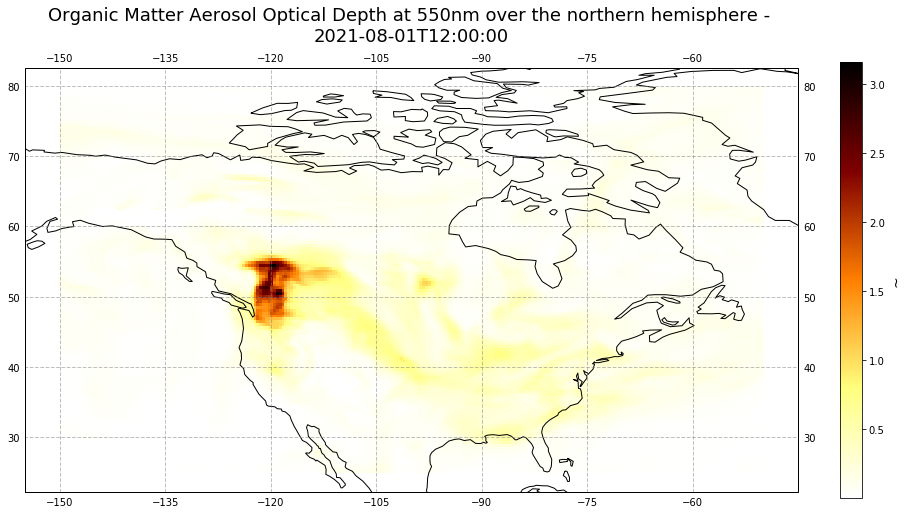

In [9]:
# Index of analysis step
time_index = 2

# Initiate a matplotlib figure
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# Plotting function with pcolormesh
im = plt.pcolormesh(omaod550['longitude'].values, 
                    omaod550['latitude'].values,
                    omaod550[time_index,:,:], 
                    cmap='afmhot_r', 
                    transform=ccrs.PlateCarree())


# Add additional features such as coastlines, grid and colorbar
ax.coastlines(color='black')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
cbar = plt.colorbar(im,fraction=0.026, pad=0.05)
cbar.set_label(omaod550.units, fontsize=14)


# Set the title of the plot
ax.set_title(omaod550.long_name + ' over the northern hemisphere - \n' + str(omaod550.time[time_index].values)[:-10]+'\n', fontsize=18)



<hr>

<p><img src='./img/copernicus_logo.png' align='right' alt='Logo EU Copernicus' width='20%'></img></p>
<br><br><br><br>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>